In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quickdraw/quickDrawW/test/Airplane/173.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/248.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/94.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/236.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/48.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/227.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/238.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/61.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/222.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/278.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/37.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/231.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/148.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/35.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/232.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/177.png
/kaggle/input/quickdraw/quickDrawW/test/Airplane/142.png
/kaggle/input/quickdraw/quickDrawW/t

In [9]:
# libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from matplotlib import pyplot
from glob import glob
import seaborn
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:

train_path = "../input/quickdraw/quickDrawW/train"
test_path = "../input/quickdraw/quickDrawW/test"

file_path = "quickdraw.h5"


In [11]:
className = glob(train_path + '/*')
numberOfClass = len(className)
print("NumberOfClass: ", numberOfClass)


NumberOfClass:  10


In [12]:
img = load_img("../input/quickdraw/quickDrawW/train/Apple/1.png")
x = img_to_array(img)
x.shape
x.shape[:2]

(28, 28)

In [13]:
activation="relu"
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(28,28,1)))
model.add(Activation(activation))

model.add(Conv2D(128, (3, 3)))
model.add(Activation(activation))

model.add(Conv2D(64, (3, 3)))
model.add(Activation(activation))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation(activation))
model.add(Dropout(0.2))

model.add(Dense(numberOfClass))  # output
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
batch_size =128


In [14]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=7,
                   patience=17,
                  )
checkpoint = ModelCheckpoint(
    file_path,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
)


#  Data Generation - Train - Test
test_datagen = ImageDataGenerator(rescale= 1./255)


train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   zoom_range=0.3,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=x.shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training"
)



validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=x.shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=x.shape[:2],
        batch_size = batch_size,
        shuffle=False,
        color_mode= "grayscale",
        class_mode= "categorical")


hist = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1000 // batch_size,
    callbacks=[es,checkpoint] 
    
)


Found 5600 images belonging to 10 classes.
Found 1400 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Epoch 1/100
15/15 [==============================] - 23s 2s/step - loss: 3.7573 - accuracy: 0.1402 - val_loss: 2.3434 - val_accuracy: 0.1027
Epoch 2/100
15/15 [==============================] - 23s 2s/step - loss: 2.0547 - accuracy: 0.2692 - val_loss: 1.3641 - val_accuracy: 0.5335
Epoch 3/100
15/15 [==============================] - 23s 2s/step - loss: 1.4500 - accuracy: 0.4974 - val_loss: 1.3064 - val_accuracy: 0.5413
Epoch 4/100
15/15 [==============================] - 22s 1s/step - loss: 1.1799 - accuracy: 0.6132 - val_loss: 1.0958 - val_accuracy: 0.6440
Epoch 5/100
15/15 [==============================] - 23s 2s/step - loss: 1.1187 - accuracy: 0.6243 - val_loss: 0.9996 - val_accuracy: 0.6507
Epoch 6/100
15/15 [==============================] - 22s 1s/step - loss: 1.0001 - accuracy: 0.6674 - val_loss: 0.8769 - val_accuracy: 0.6875
Epoch 7/100
15/15 [======

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        73792     
_________________________________________________________________
activation_7 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)       

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       300
           1       0.99      0.97      0.98       300
           2       0.78      0.90      0.83       300
           3       0.95      0.85      0.90       300
           4       0.87      0.92      0.90       300
           5       0.92      0.87      0.89       300
           6       0.84      0.64      0.72       300
           7       0.97      0.99      0.98       300
           8       0.95      0.97      0.96       300
           9       0.79      0.92      0.85       300

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.89      3000
weighted avg       0.90      0.90      0.89      3000

[[0.92333333 0.         0.06       0.         0.00333333 0.
  0.00666667 0.         0.         0.00666667]
 [0.         0.97333333 0.01666667 0.         0.         0.00333333
  0.         0.00666667 0.         0.        ]
 [0.03       0.    

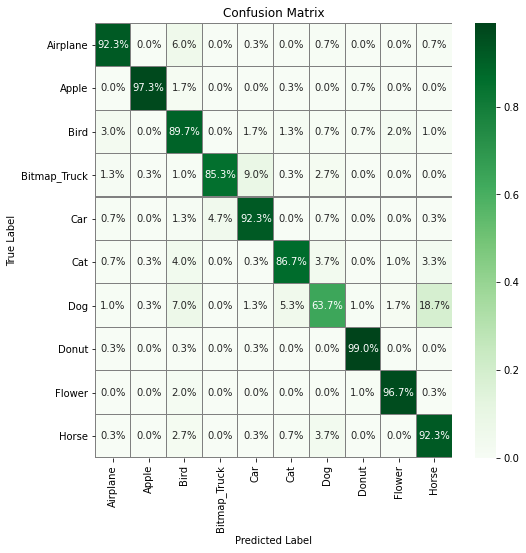

In [15]:
model.save_weights("quickdraw.h5")
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict(test_generator)
val_preds = np.argmax(predict, axis=-1)
val_trues = test_generator.labels
    
cm = metrics.confusion_matrix(val_trues, val_preds)
print(classification_report(val_trues, val_preds))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)
f,ax = plt.subplots(figsize=(8, 8))
a=sns.heatmap(cm,annot=True,linewidths=0.01,
              cmap="Greens",xticklabels=test_generator.class_indices.keys(),
              yticklabels=test_generator.class_indices.keys(),
              linecolor="gray", fmt='.1%',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


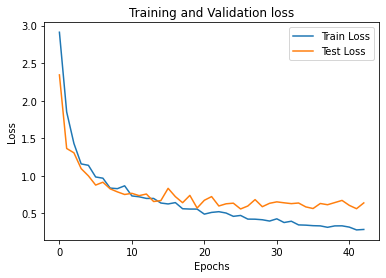

In [16]:

print(hist.history.keys())
pyplot.plot(hist.history['loss'],label="Train Loss")
pyplot.plot(hist.history['val_loss'],label="Test Loss")
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()


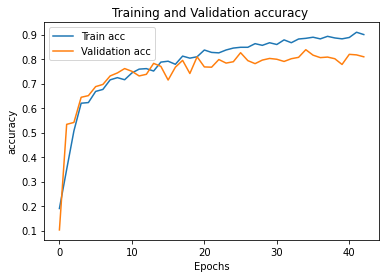

In [17]:
pyplot.figure()
pyplot.plot(hist.history["accuracy"], label="Train acc")
pyplot.plot(hist.history["val_accuracy"], label="Validation acc")
pyplot.title('Training and Validation accuracy ')
pyplot.xlabel('Epochs')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()